The following codes are from this link:
https://www.maartengrootendorst.com/blog/bertopic/

# 1 Dataset

In [ ]:
# training dataset is from sklearn package
# 18000 news posts on 20 topics

import sklearn
from sklearn.datasets import fetch_20newsgroups 

# use a categories to reduce embedding processing time
# remove 'categories' after the script works
data = fetch_20newsgroups(subset = 'all', categories = ['comp.graphics'])['data']

In [ ]:
# check out some sample data
# basically all emails chain
# print(data[3])


# *This script did not preprocess data before embeddings (e.g., stop words/lemmaization/stemming)

# 2. Embeddings 

To convert documents to numerical data via sentence-transformer

Sentence-transformer work well for document_level embeddings 

In [ ]:
# per https://pypi.org/project/sentence-transformers/
# Below is the way to install sentence_transformers package

!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 5.8 MB 10.1 MB/s 
     |████████████████████████████████| 1.3 MB 50.7 MB/s 
     |████████████████████████████████| 182 kB 71.2 MB/s 
     |████████████████████████████████| 7.6 MB 49.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d3cd81bb7d31d880d7c4b02b0c5f7f009a8c1764c281a1419a30ebe313b79e7a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer

'''
'distilbert-base-nli-mean-tokens' is a transformer model loaded to do the embedding
distilbert gives a nice balance between speed and performance
check manual to see other models
'''
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# model.encode is the func to encode each document (i.e., email with the above dataset)
embeddings = model.encode(data, show_progress_bar = True)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:

'''
sentence transformers (SBERT) use mean pooling on the final output layer to produce sentence embedding
ref: https://www.pinecone.io/learn/sentence-embeddings/
thats why the output data of each embedding is a 1x786 dimensional vector (BERT is 512 x 768)
'''

# len(embeddings[2000])

'\nsentence transformers (SBERT) use mean pooling on the final output layer to produce sentence embedding\nref: https://www.pinecone.io/learn/sentence-embeddings/\nthats why the output data of each embedding is a 1x786 dimensional vector (BERT is 512 x 768)\n'

# 3. Clustering
(1) UMAP

first to lower the dimensionality of the embeddings 

as many clustering algorithms do not handle high dimenstionality well

*** if use a clustering algorithm that can handle hgih dimensionality well (e.g., cosine_based k-means), this step can be skipped

In [ ]:
'''
UMAP is the dimensionality reduction algorithms that with best performance 
as it keeps significant portion of the high-dimensional local structure in lower dimensionality

UMAP turn euclidean space coordinates into topoligical space coordinates
topo space coordinates (n-dimensional manifolds) allows complicated structure (i.e., high dimensions in eucllidean space) to be described
in a simpler topo space

a manifold: a topo space that locally resembles euclidean space near each point

ref: https://en.wikipedia.org/wiki/Manifold
'''

!pip install umap-learn


'''
maniford structure: 
'''

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 9.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9b1916273110d01417c954e317d966ec5cb3fe8fc97503964440887a749d205e
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=d484b8303c4d22d349462494ba0938a9a0e086fb1b1ed38782be1bba6038ee1c
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


'\nmaniford structure: \n'

In [ ]:
import umap

'''
low value of n_neighbor forces UMAP to concentrate on very local structure 
(potential to the detriment of the big picture)

high value push UMAP to look at larger neighborhoods of each point when estimating
the maniford structure of the data
losing fine detail structure for the sake of getting the broader of the data

ref: https://umap-learn.readthedocs.io/en/latest/parameters.html
'''

umap_embeddings = umap.UMAP(n_neighbors = 15
                            # keep local beighborhood at 15
                            # n_neighbor balances local vs global structure in the data

                            ,n_components= 5
                            # n_components: the dimensionality of the reduced dimension in topo space 

                            ,metric = 'cosine').fit_transform(embeddings)

In [ ]:
# shape shows (data size, each data dimension)
# should be (input news size, 5)
umap_embeddings.shape

(973, 5)

In [ ]:
# 2nd example, the coordinates in topo space to represent 768 dimensions in eculidean space
umap_embeddings[1]

array([13.013492 ,  7.046455 ,  3.9336257,  2.4798658,  6.3673615],
      dtype=float32)

# 3. Clusting
(2) HDBSAN

HDBSCAN is to culster the data

HDBSCAN is a density-based algorithm that works quite well with UMAP

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700823 sha256=125e20fe35d246d1fbeb4fb048ed15acb141afe5a7eeb105eee6c16cdfbb290c
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

'''
this step generate clusters that collect similar documents together
'''

'''
HDBSCAN Core Concept 

3 types of distance between 2 point: 
1. core distance of point A (radius to reach certain number k of the closest neighbors, e.g., 5)
2. core distance of point B (radius to reach the same number of the closest neighbors)
3. euclidean distance between A and B

max(1,2,3) is 'mutual reachability distance'(MRD)

Each point will have MRD with another point
Set and adjust threshold of MRD value to max -> generate 1 cluster that includes all
MRD value to min -> each point becomes a cluster

Instead of calculating n^2 number of MRD (between all points), 
use Prim's algorithm to find the min spanning trees
i.e., from an arbitrary point, connect to next point based on the min MRD

As a result, a min spanning tree (using MRD instead of pure distance) generated with set k value

With the change of MRD change from max to min, 1 cluster turns into multiple cluster
use 'min_cluster_size' to control 'oversplitting'

Create another parameter lambda (λ): 1/distance 
λ can be for a cluster or for a point before falling off
For each cluster, stability = Σ(λp - λbirth)

the cluster with the biggest sum is the selected cluster from the HDBSCAN algorithm

ref: https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

'''



# min_cluster_size: min number of dots to be qualified as a cluster
# 'eom': excess of mass; tend to pick 1/2 big clusters and a number of small extra clusters
# cluster includes the cluster results/labels

cluster = hdbscan.HDBSCAN(min_cluster_size = 15
                          ,metric = 'euclidean'
                          ,cluster_selection_method = 'eom').fit(umap_embeddings)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# min_dist controls how tightly UMAP is allowed to pack points together 
# low value lead to clumpier embeddings; useful for clustering
# default value as 0.1
umap_data = umap.UMAP(n_neighbors = 15
                      ,n_components = 2
                      ,min_dist = 0.0
                      ,metric = 'cosine').fit_transform(embeddings)
                    
result = pd.DataFrame(umap_data, columns = ['x', 'y'])

result['labels'] = cluster.labels_

# note that in result df, x/y is from umap_data
# labels are from cluster that is based on umap_embeddings 
# umap_data is different from umap_embeddings in terms of n_components size (5 vs. 2)

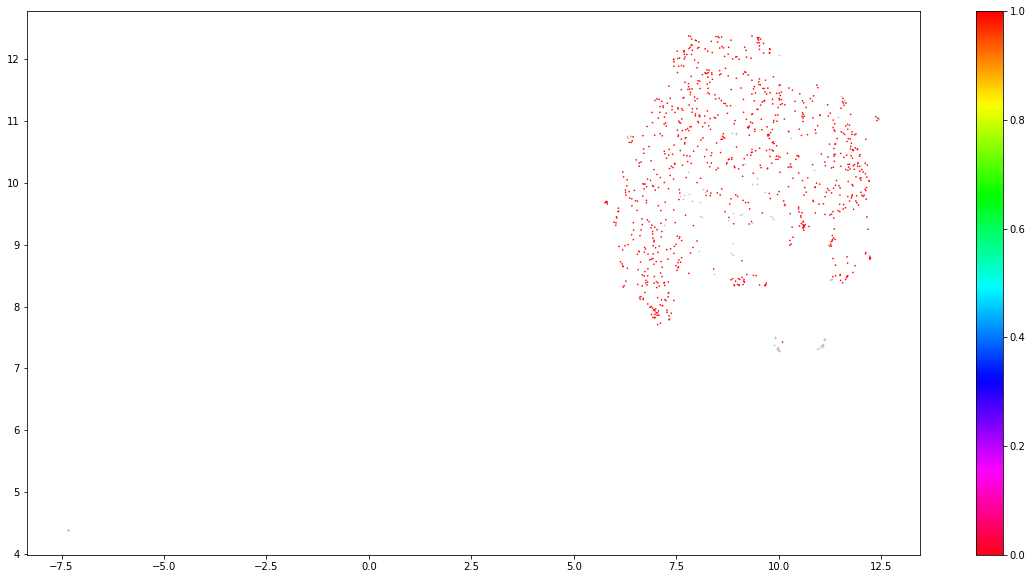

In [ ]:
# viz the clusters

# create new figure amd set up figure size
fig, ax = plt.subplots(figsize = (20, 10))

# note that there is value '0' in labels
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels !=-1, :]

# s -> size
# cmap -> color map
plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.4)
plt.scatter(clustered.x, clustered.y, c = clustered.labels, s = 0.4, cmap = 'hsv_r')
plt.colorbar()

# 4. Topic Creation

Generate topics from clustered documents with class-based variant of TF-IDF 

TF-IDF compares the importance of words between documents

If combine all documents in the same cluster, TF-IDF will show the important words. Those can be considered as topics

In [ ]:
# create a single document for each cluster for application of TF-IDF

docs_df = pd.DataFrame(data, columns = ['Doc'])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))

# combine all texts from the same topci together in 1 new document for each topic
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range = (1,1)):
  # only do unigrams
  count = CountVectorizer(ngram_range = ngram_range, stop_words='english').fit(documents)
  t = count.transform(documents).toarray()
  
  # sum by y axis
  # total appearance of each token in all topics combined
  w = t.sum(axis = 1)

  # t.T put 1st/2nd/... value of each topics in one list in a new array
  # divided by the sum of the count of that words appeared in all documents
  # tf: number of times the term appears in the document/total number of terms in the document
  tf = np.divide(t.T, w)

  # sum by x axis -> the total appearance of each token in the corpus
  sum_t = t.sum(axis = 0)
  
  # here the idf calculation seems odd to me
  # typical idf = log(number of documents in corpus/number of documents in corpus that contains the term)
  # here sum_t represents different concept
  idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
  
  tf_idf = np.multiply(tf, idf)

  return tf_idf, count

tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m = len(data))

In [ ]:
'''
extract the top 20 words per topics
'''

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n = 20):
  
  # get the token names
  words = count.get_feature_names()
  
  labels = list(docs_per_topic.Topic)
  
  # after T, rows represents topics, columns represents each token
  tf_idf_transposed = tf_idf.T

  '''
  argsort returns the indices that can rank the dimension in ascending way
  -n: gives the largest n tf-idf values

  example:
    a = np.array([[5,3,4,2,1], [1,2,4,3,5], [1,2,3,4,5]])
    a.argsort() return the indices that would sort an array
    e.g., in [5,3,4,2,1], argsort returns result [4,3,1,2,0]
    in result 4 -> position 4 -> retrieve 1
    3 -> retrieve 2
    1 -> retrieve 3
    2 -> retrieve 4
    0 -> position 0 -> retrieve 5
    a.argsort()
  '''
  indices = tf_idf_transposed.argsort()[:, -n:]

  # used [::-1] to list top n words
  top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}

  return top_n_words



def extract_topic_sizes(df):
  # create new df to show number of doc in each topics
  topic_sizes = (df.groupby(['Topic'])
                   .Doc
                   .count()
                   .reset_index()
                   .rename({'Topic': 'Topic', 'Doc': 'Size'}, axis = 'columns')
                   .sort_values('Size', ascending = False))
  
  return topic_sizes


top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n = 20)

topic_sizes = extract_topic_sizes(docs_df)

# topic -1 means the documents have no topics assigned
# HDBSCAN does not force each documents to go to a cluster if no appropriate one found
topic_sizes.head(10)




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
2,1,854
0,-1,92
1,0,27


In [ ]:
# [1] represents topic id
# [:5] gives the top n words (i.e., key words)
top_n_words[1][:5]

[('thanks', 0.0032436678797991723),
 ('nntp', 0.0030194952821502043),
 ('writes', 0.0030148655483663526),
 ('know', 0.0028309115454249),
 ('posting', 0.002816501782894434)]